# Trading breakout from consolidation with Crude Oil

In [1]:
import numpy as np
import pandas as pd

import bt
import talib
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# import seaborn as sns
# sns.set_style('darkgrid')



### Hyperparameter

In [2]:
min_max_window = 10 # 10 trading days, 2 weeks
regress_window = 10 # 


## Charting Daily price of Crude Oil

In [3]:
cl = yf.download("CL=F", start="2000-01-01", end="2024-12-31")
cl.columns = ["Close", "High", "Low", "Open", "Volume"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


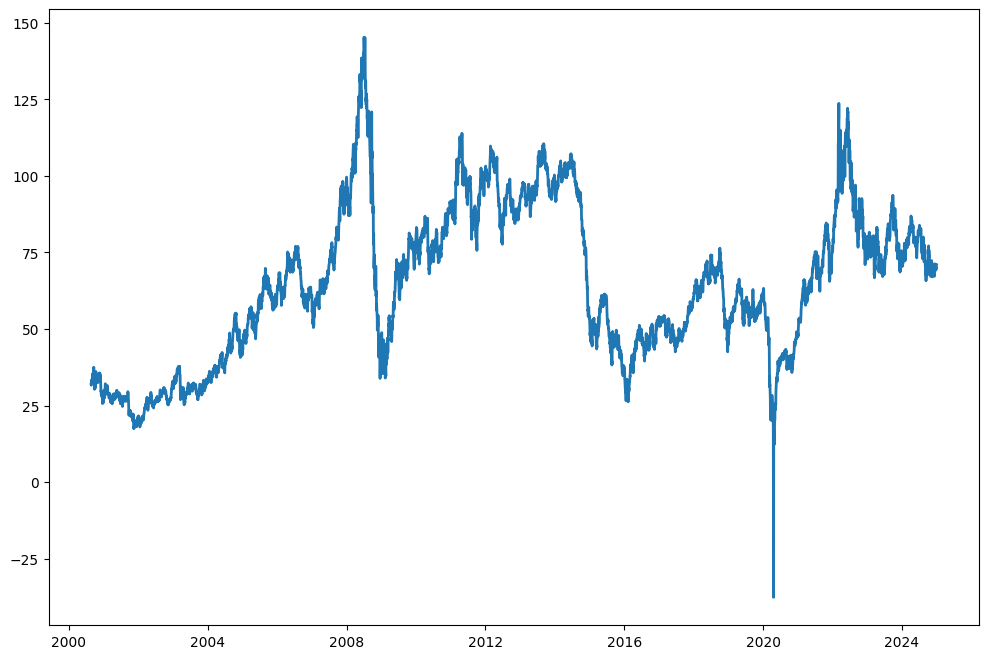

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(cl["Close"], label="Close", linewidth= 2, color="C0")
plt.show()

In [5]:
def create_moving_averages(df, column_name, ma_func, periods):
    df1 = df.copy()
    for period in periods:
        df1[f"SMA{period}"] = ma_func(df1[column_name], timeperiod=period)

    return df1

cl = create_moving_averages(cl, "Close", talib.SMA, [5, 10, 20, 50, 100, 200])

In [6]:
cl["Max"] = cl["Close"].rolling(window=min_max_window).max()
cl["Min"] = cl["Close"].rolling(window=min_max_window).min()
cl["Max15"] = cl["Close"].shift(1).rolling(window=15).max()
cl["Min15"] = cl["Close"].shift(1).rolling(window=15).min()

cl["Adx"] = talib.ADX(cl["High"], cl["Low"], cl["Close"], timeperiod=14)


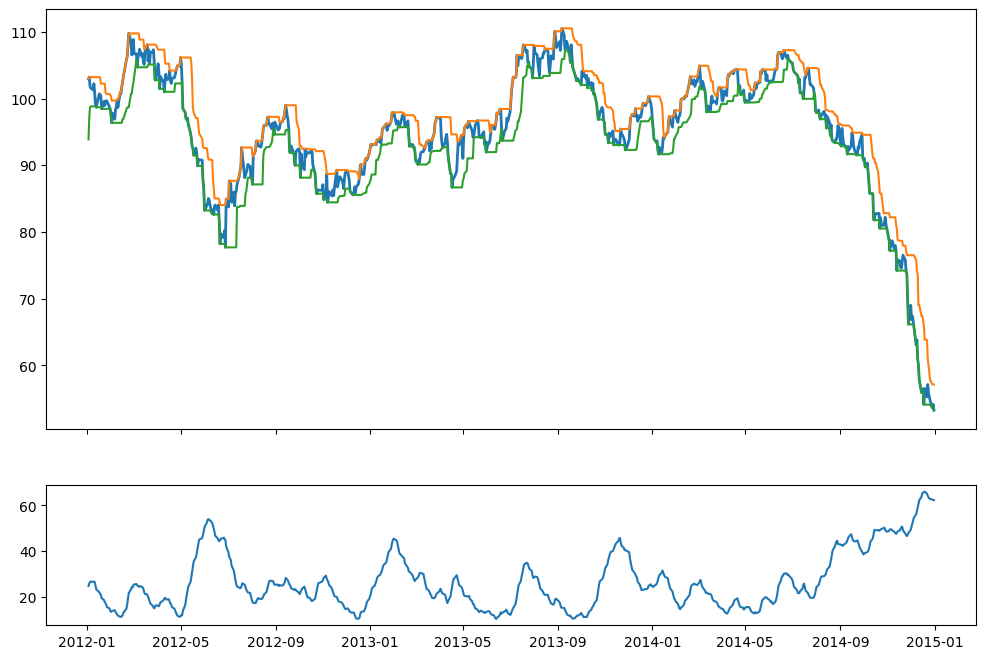

In [7]:
cl201617 = cl.loc["2012":"2014"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl201617["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl201617["Max"], label="Max", color="C1")
ax1.plot(cl201617["Min"], label="Min", color="C2")

ax2.plot(cl201617["Adx"], label="ADX", color="C0")


From 2013-07 to 2013-10, there seems to be a consolidation pattern with low adx, let's see if the algorithm can identify it with upper and lower bond. 


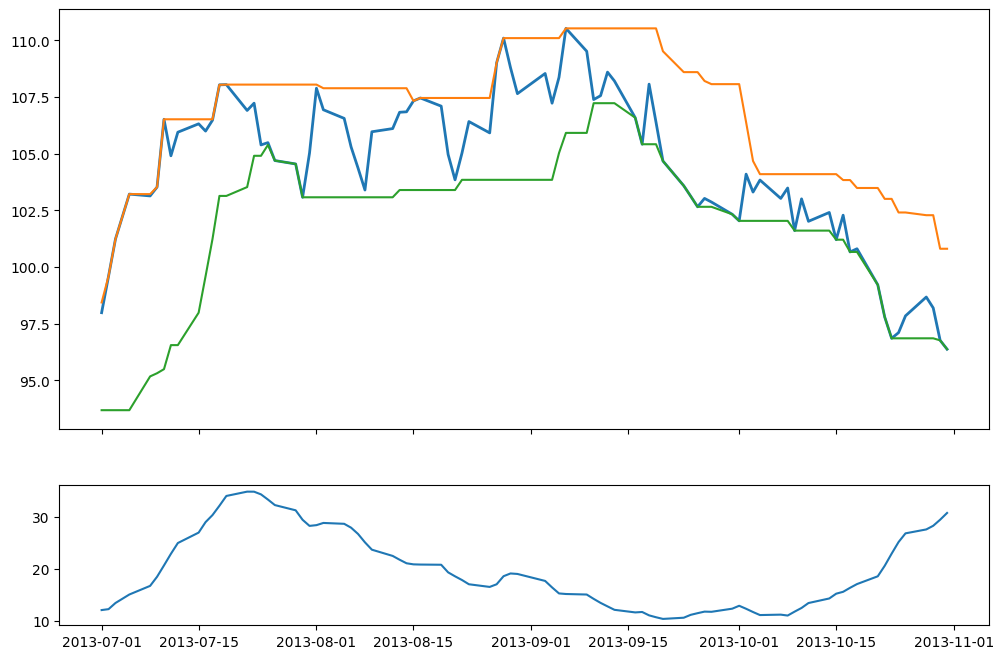

In [8]:
cl2013a = cl.loc["2013-07":"2013-10"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2013a["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2013a["Max"], label="Max", color="C1")
ax1.plot(cl2013a["Min"], label="Min", color="C2")

ax2.plot(cl2013a["Adx"], label="ADX", color="C0")


## Run linear regression on consolidation period

In [9]:
def regress_boundary(data):
    x = np.arange(0, data.shape[0])
    x = x.reshape(-1, 1)
    y = data
    model = LinearRegression()

    model.fit(x, y)
    predictions = model.predict(x)
    return predictions

In [10]:
upper = regress_boundary(cl2013a["Max"])
lower = regress_boundary(cl2013a["Min"])


Text(0.5, 1.0, 'ADX')

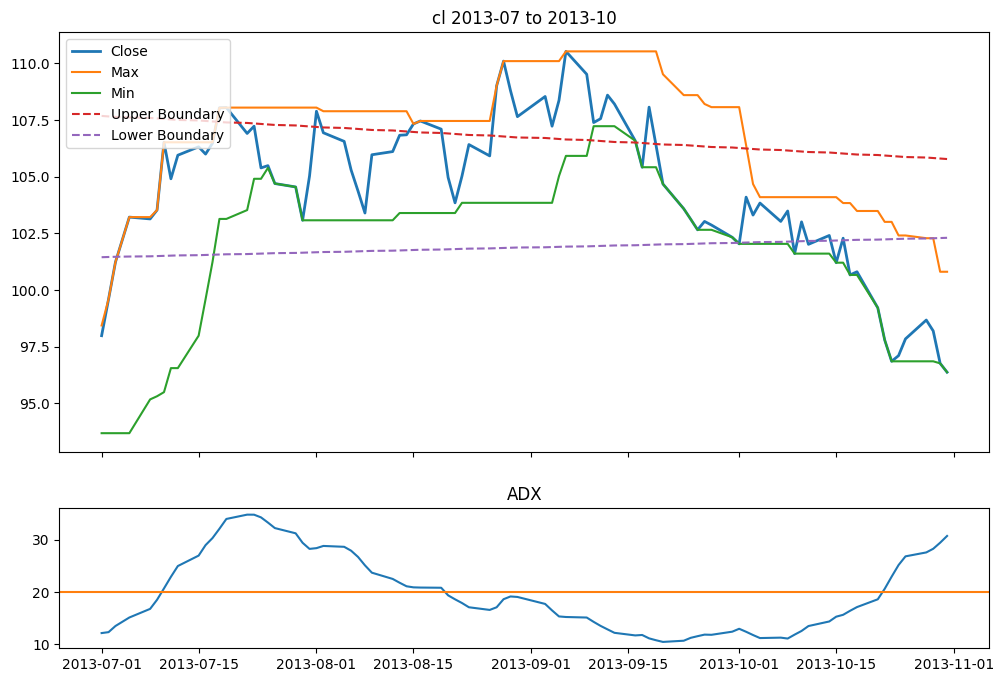

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2013a.index, cl2013a["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2013a.index, cl2013a["Max"], label="Max", color="C1")
ax1.plot(cl2013a.index, cl2013a["Min"], label="Min", color="C2")
ax1.plot(cl2013a.index, upper, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2013a.index, lower, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2013-07 to 2013-10")
ax1.legend(loc="upper left")

ax2.plot(cl2013a["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

In [12]:
cl2013a.shape[0]

87

the regression line is draw on a 80 day period. with Max() on a 10 day window. 
The length of the regression period, and the length of the Max(window= ) shifts the upper and lower edge. 
If we regress in the period 2013-07-15 and 2013-09-15, the boundary will fit the price channel much better. 

Text(0.5, 1.0, 'ADX')

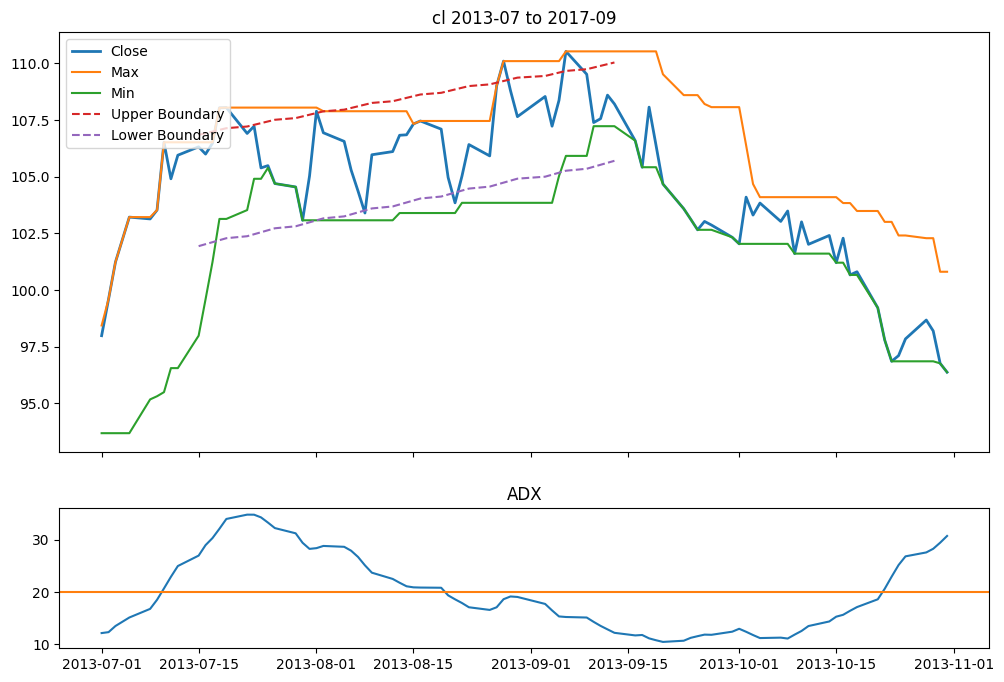

In [13]:
# cl2013b = cl.loc["2013-07-15":"2013-09-15"]
cl2013b = cl.loc["2013-07-15":"2013-09-15"]

upper2 = regress_boundary(cl2013b["Max"])
lower2 = regress_boundary(cl2013b["Min"])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2013a.index, cl2013a["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2013a.index, cl2013a["Max"], label="Max", color="C1")
ax1.plot(cl2013a.index, cl2013a["Min"], label="Min", color="C2")
ax1.plot(cl2013b.index, upper2, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2013b.index, lower2, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2013-07 to 2017-09")
ax1.legend(loc="upper left")

ax2.plot(cl2013a["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

## Run linear regression on trending period

In [14]:
cl2014 = cl.loc["2014-09":"2015-01"]

upper = regress_boundary(cl2014["Max"])
lower = regress_boundary(cl2014["Min"])

Text(0.5, 1.0, 'ADX')

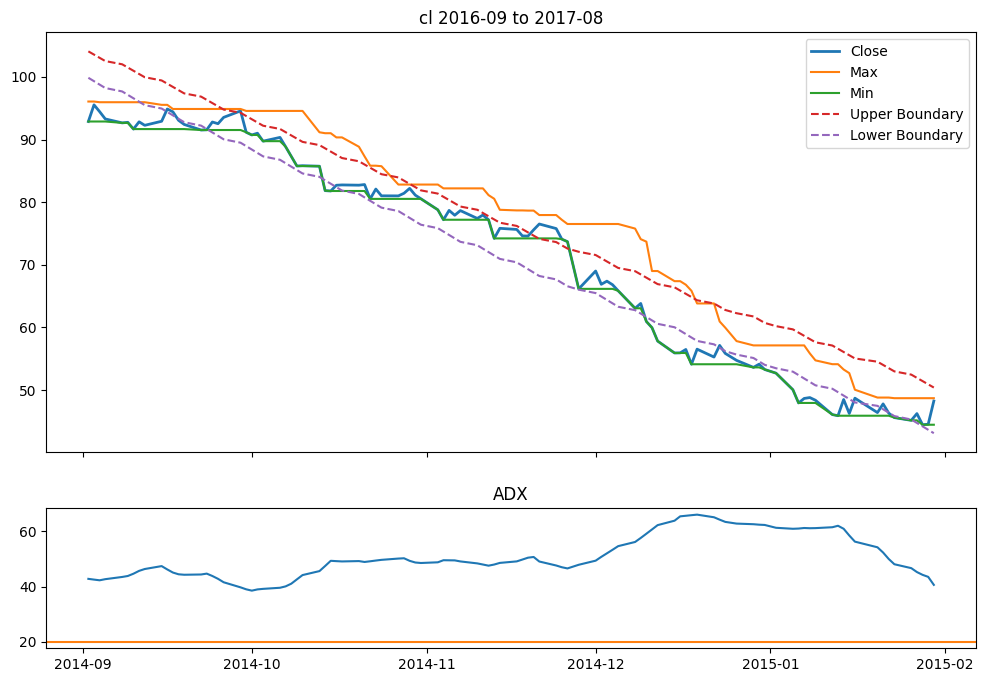

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2014.index, cl2014["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2014.index, cl2014["Max"], label="Max", color="C1")
ax1.plot(cl2014.index, cl2014["Min"], label="Min", color="C2")
ax1.plot(cl2014.index, upper, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2014.index, lower, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2016-09 to 2017-08")
ax1.legend(loc="upper right")

ax2.plot(cl2014["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

### Regress on upper and lower bound continously, on a 14 day window

In [16]:

def get_boundary_point_estimate(data):
    predictions = regress_boundary(data)
    # i = int(-(regress_window/2))
    i = -1
    return predictions[i]


cl["Upper"] = cl["Max"].rolling(window=regress_window).apply(get_boundary_point_estimate)
cl["Lower"] = cl["Min"].rolling(window=regress_window).apply(get_boundary_point_estimate)


Text(0.5, 1.0, 'ADX')

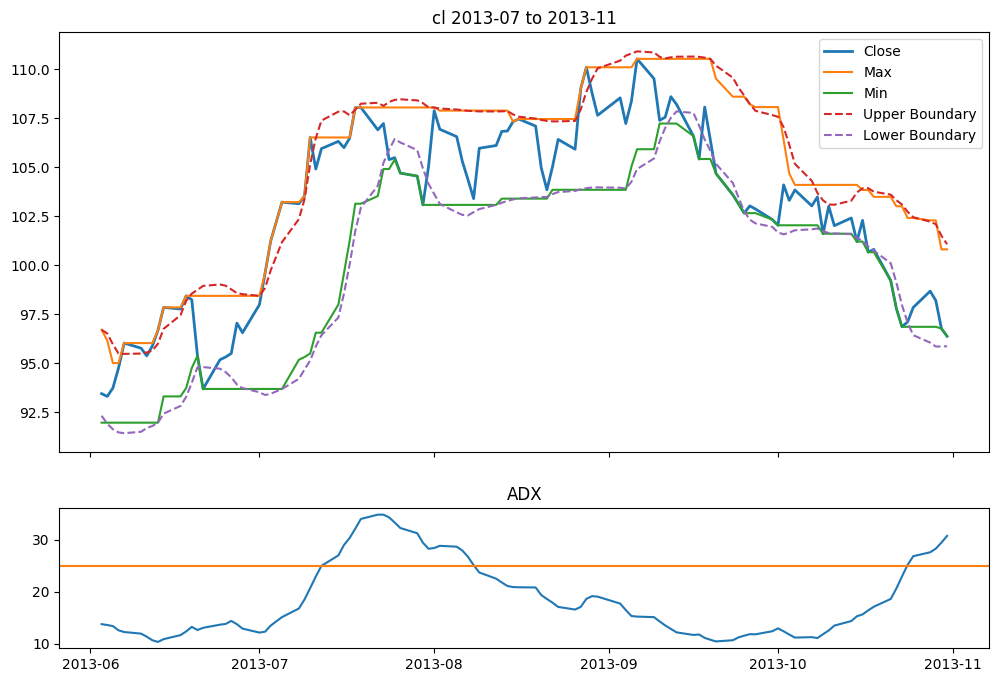

In [17]:
cl2013a = cl.loc["2013-06":"2013-10"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2013a.index, cl2013a["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2013a.index, cl2013a["Max"], label="Max", color="C1")
ax1.plot(cl2013a.index, cl2013a["Min"], label="Min", color="C2")
ax1.plot(cl2013a.index, cl2013a["Upper"], label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2013a.index, cl2013a["Lower"], label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2013-07 to 2013-11")
ax1.legend(loc="upper right")

ax2.plot(cl2013a["Adx"], label="ADX", color="C0")
ax2.axhline(y=25, color="C1")
ax2.set_title("ADX")

## Signaling when consolidatin period is identified

We can see that the boundary somewhat captures the price channel. We can see that: 

1. between 2016-07 and 2016-10, the price is on on uptrend. It can be distinguished by the positive slope of the regression channel and ADX > 30. 
2. between 2017-01 and 2017-07, the price is trendless/consolidating. It can be distinguished by the close to zero slope of the regression channel and ADX < 30. 
3. There is a false breakout (downward price movement) in 2017, followed by a upward breakout around 2017-09

In [18]:
def get_model_parameters(data): 
    x = np.arange(0, data.shape[0])
    x = x.reshape(-1, 1)
    y = data

    model = LinearRegression()
    model.fit(x, y)

    return model.coef_[0]

cl["UpperSlope"] = cl["Upper"].rolling(window=regress_window).apply(get_model_parameters)
cl["LowerSlope"] = cl["Lower"].rolling(window=regress_window).apply(get_model_parameters)

cl.tail()

,Close,High,Low,Open,Volume,SMA5,SMA10,SMA20,SMA50,SMA100,SMA200,Max,Min,Max15,Min15,Adx,Upper,Lower,UpperSlope,LowerSlope
Date,,,,,,,,,,,,,,,,,,,,
2024-12-23,69.239998,69.940002,68.589996,69.400002,188843,69.854001,70.017,69.2525,69.6808,71.1810,75.90890,71.290001,68.589996,71.290001,67.199997,10.054259,71.613637,68.020544,0.179510,0.035647
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602,69.858000,70.168,69.3105,69.6062,71.1468,75.86975,71.290001,69.239998,71.290001,67.199997,9.339363,71.526365,68.585635,0.189465,0.123087
2024-12-26,69.620003,70.750000,69.330002,70.199997,144877,69.666000,70.101,69.3530,69.5870,71.1136,75.83005,71.290001,69.239998,71.290001,67.199997,8.947046,71.435455,69.039453,0.168540,0.210885
2024-12-27,70.599998,70.750000,69.440002,69.680000,172641,69.803999,70.159,69.4470,69.5912,71.0876,75.78445,71.290001,69.239998,71.290001,67.199997,8.582752,71.290001,69.381998,0.116055,0.284623
2024-12-30,70.989998,71.559998,70.120003,70.419998,199296,70.109999,70.129,69.5965,69.5976,71.0452,75.73310,70.989998,69.239998,71.290001,67.199997,8.948543,71.186363,69.613271,0.060909,0.331110


Text(0.5, 0.98, 'Slope of the Upper and Lower Boundaries on conslidation period')

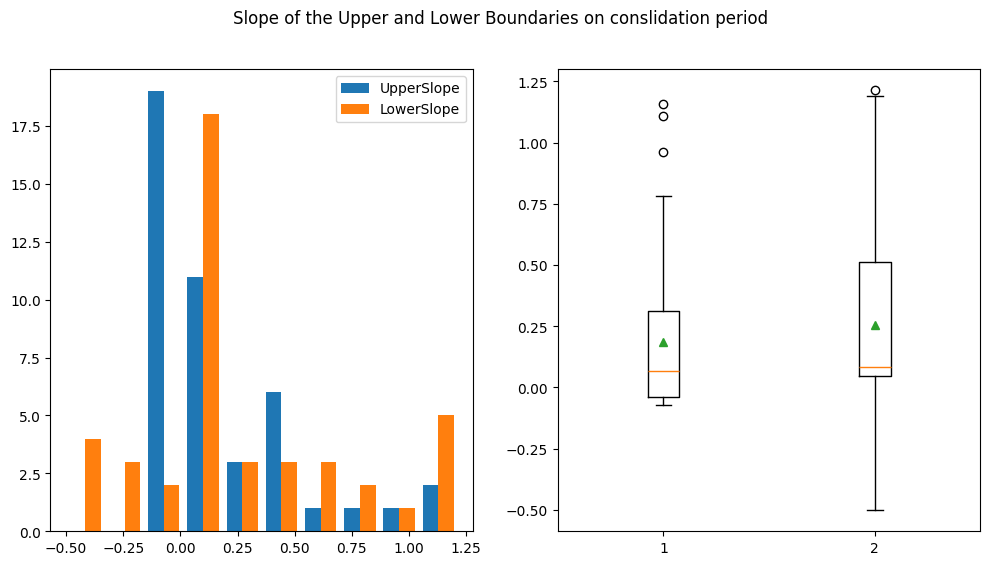

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(cl.loc["2013-07-15":"2013-09-15", ["UpperSlope", "LowerSlope"]], bins=10)
ax1.legend(["UpperSlope", "LowerSlope"])

ax2.boxplot(cl.loc["2013-07-15":"2013-09-15", ["UpperSlope", "LowerSlope"]], showmeans=True)
# ax2.legend(["UpperSlope", "LowerSlope"])
fig.suptitle("Slope of the Upper and Lower Boundaries on conslidation period")

Text(0.5, 0.98, 'Slope of the Upper and Lower Boundaries on trending period')

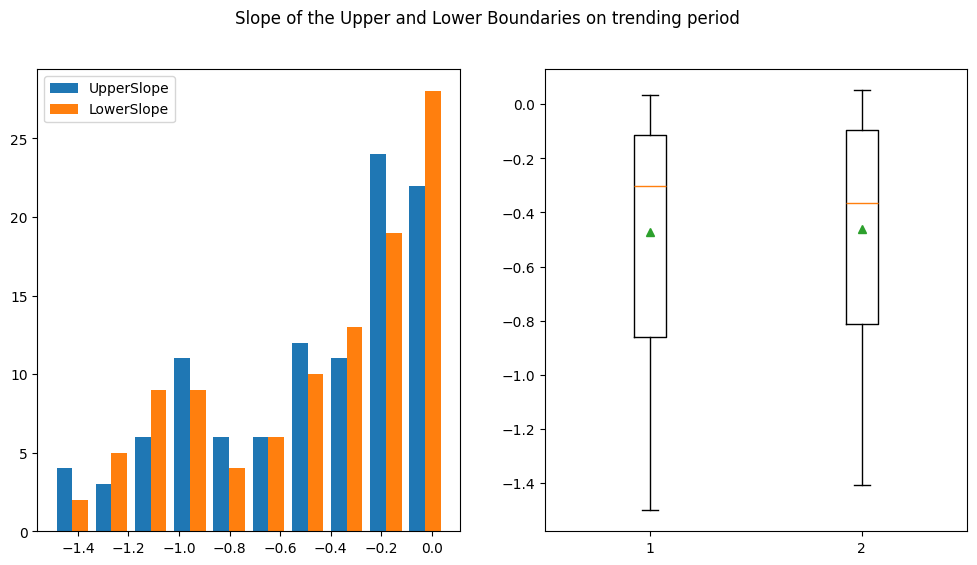

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(cl.loc["2014-09":"2015-01", ["UpperSlope", "LowerSlope"]], bins=10)
ax1.legend(["UpperSlope", "LowerSlope"])

ax2.boxplot(cl.loc["2014-09":"2015-01", ["UpperSlope", "LowerSlope"]], showmeans=True)

fig.suptitle("Slope of the Upper and Lower Boundaries on trending period")


As we can see, in the consolidation period, the IQR is between -0.5 and 0.5. In trending period, the IQR is outside [-0.5, 0.5]. Let's use this as a criteria to identify consolidation period. 

### Generate trending range signal

The SignalAlgo does the following: 
1. taking 10 day max and min to find the upper and lower boundary
2. run linear regression on the boundaries 
3. if IQR of slopes from the continous linear regression models is between [-0.5, 0.5], a tranding range is established. 

   

In [21]:
def check_slope(slope):
    p25, p75 = np.percentile(slope, [25, 75])
    if np.isnan(p25) or np.isinf(p75):
        return False
    
    return True if (p25 > -0.5 and p75 < 0.5) else False

def is_in_trading_range_for_consecutive_5_days(flags):
    sum = np.sum(flags)
    return True if (sum == 5.0) else False

In [22]:
cl["upper_slope_flat"] = cl["UpperSlope"].rolling(window=regress_window).apply(check_slope)
cl["upper_slope_flat"] = cl["upper_slope_flat"].map(lambda x: True if x == 1.0 else False)

cl["lower_slope_flat"] = cl["LowerSlope"].rolling(window=regress_window).apply(check_slope)
cl["lower_slope_flat"] = cl["lower_slope_flat"].map(lambda x: True if x == 1.0 else False)

cl["in_trading_range"] = cl["upper_slope_flat"] & cl["lower_slope_flat"]

cl["tr_consecutive5"] = cl["in_trading_range"].rolling(window=5).apply(is_in_trading_range_for_consecutive_5_days)
cl["tr_consecutive5"] = cl["tr_consecutive5"].map(lambda x: True if x == 1.0 else False)
cl

,Close,High,Low,Open,Volume,SMA5,SMA10,SMA20,SMA50,SMA100,...,Min15,Adx,Upper,Lower,UpperSlope,LowerSlope,upper_slope_flat,lower_slope_flat,in_trading_range,tr_consecutive5
Date,,,,,,,,,,,,,,,,,,,,,
2000-08-23,32.049999,32.799999,31.950001,31.950001,79385,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2000-08-24,31.629999,32.240002,31.400000,31.900000,72978,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2000-08-25,32.049999,32.099998,31.320000,31.700001,44601,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2000-08-28,32.869999,32.919998,31.860001,32.040001,46770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2000-08-29,32.720001,33.029999,32.560001,32.820000,49131,32.264000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,69.239998,69.940002,68.589996,69.400002,188843,69.854001,70.017,69.2525,69.6808,71.1810,...,67.199997,10.054259,71.613637,68.020544,0.179510,0.035647,True,True,True,True
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602,69.858000,70.168,69.3105,69.6062,71.1468,...,67.199997,9.339363,71.526365,68.585635,0.189465,0.123087,True,True,True,True
2024-12-26,69.620003,70.750000,69.330002,70.199997,144877,69.666000,70.101,69.3530,69.5870,71.1136,...,67.199997,8.947046,71.435455,69.039453,0.168540,0.210885,True,True,True,True


Text(0.5, 1.0, 'Is in trading range')

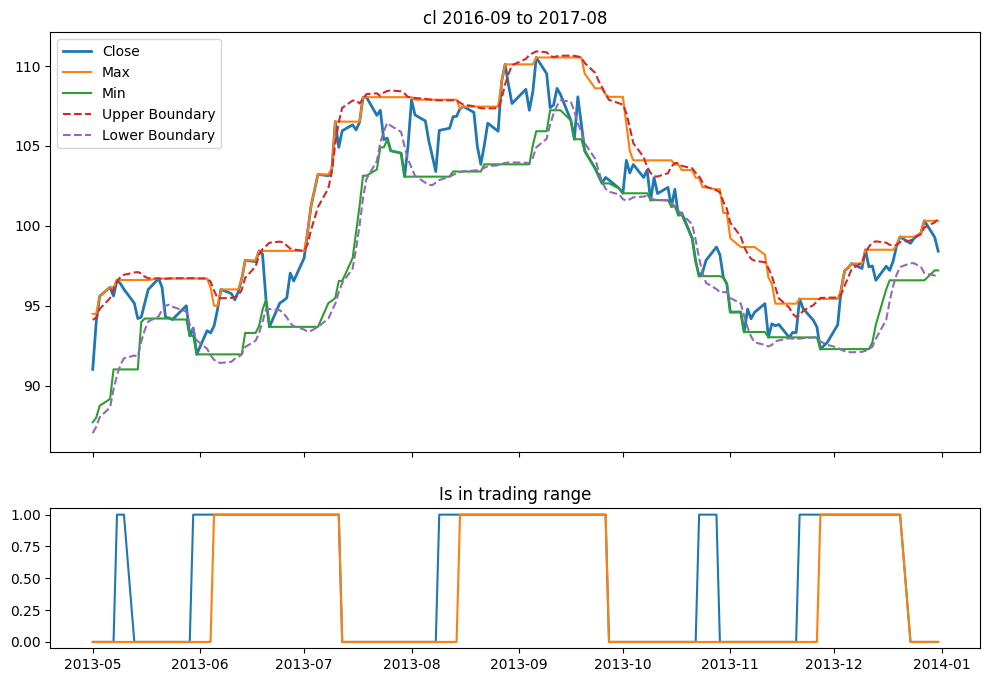

In [23]:
cl201314 = cl.loc["2013-05":"2013-12"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl201314.index, cl201314["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl201314.index, cl201314["Max"], label="Max", color="C1")
ax1.plot(cl201314.index, cl201314["Min"], label="Min", color="C2")
ax1.plot(cl201314.index, cl201314["Upper"], label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl201314.index, cl201314["Lower"], label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax2.plot(cl201314["in_trading_range"], label="in_trading_range", color="C0")
ax2.plot(cl201314["tr_consecutive5"], label="in TR consecutive 5", color="C1")

ax2.set_title("Is in trading range")

To prevent false signal from trading range, we see if if the signal has been positive for at least 5 consecutive days, generating the orange line. 

Alternative is to tune hyperparameters: 
* min_max_window
* regression_window
* IQR range

## Trading algo

1. when prices closes above or below the tranding range for 2%, a breakout occurs, go long/short, taking 100% of position 
2. stop loss is 5% retracement. 

In [30]:
def enter_position(row): 
    is_consec = True if row["tr_consecutive5"] == 1.0 else False
    # if is_consec and (row["Close"] > row["Upper"] * 1.02): 
    if is_consec and (row["Close"] > row["Max15"]): 
        return 1.0 
    # elif is_consec and (row["Close"] < row["Lower"] * 0.98):
    elif is_consec and (row["Close"] < row["Min15"]):
        return -1.0

    return 0.0
    
    
def exit_position(row): 
    if (row["weight"] == 1.0) & (row["Close"] < row["SMA20"]): 
        return 0.0 
    elif (row["weight"] == -1.0) & (row["Close"] > row["SMA20"]):
        return 0.0

    return row["weight"]
    


In [26]:
cl["weight"] = cl.apply(enter_position, axis=1)

In [27]:
buy_and_sell1 = cl.loc[cl["weight"] != 0.0].copy()

for i in range(1, len(buy_and_sell1) - 1):
    start = buy_and_sell1.iloc[i]
    end = buy_and_sell1.iloc[i+1]
    flag = (cl.index > start.name) & (cl.index < end.name)
    between = cl[flag].index
    cl.loc[between, "weight"] = start["weight"]

In [31]:
cl["weight"] = cl.apply(exit_position, axis=1)

In [32]:
cl["2013-05": "2013-11"]

,Close,High,Low,Open,Volume,SMA5,SMA10,SMA20,SMA50,SMA100,...,Adx,Upper,Lower,UpperSlope,LowerSlope,upper_slope_flat,lower_slope_flat,in_trading_range,tr_consecutive5,weight
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-01,91.029999,93.260002,90.110001,93.080002,332382,93.125999,91.074001,91.390500,92.532800,92.7761,...,22.614128,94.126546,87.042729,-0.088210,0.070588,True,False,False,False,-1.0
2013-05-02,93.989998,94.250000,90.650002,91.000000,310808,93.195999,91.700000,91.427000,92.523400,92.8534,...,21.064299,94.271818,87.444911,-0.007703,0.201225,True,False,False,False,0.0
2013-05-03,95.610001,96.040001,93.559998,93.989998,297522,93.717999,92.460000,91.572500,92.578800,92.9502,...,20.392541,94.808182,88.033639,0.079265,0.298122,True,False,False,False,0.0
2013-05-06,96.160004,97.169998,94.849998,95.580002,271004,94.050000,93.200000,91.712500,92.639400,93.0562,...,20.261609,95.481638,88.654002,0.177435,0.366721,True,False,False,False,0.0
2013-05-07,95.620003,96.260002,94.919998,95.790001,260141,94.482001,93.844000,91.783501,92.689600,93.1545,...,20.140030,96.072184,89.777092,0.279596,0.441754,True,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-22,94.839996,95.570000,94.050003,95.290001,257843,93.995999,93.963999,94.793499,99.346199,102.9166,...,42.336767,94.692547,92.980180,-0.401361,0.058894,True,True,True,False,0.0
2013-11-25,94.089996,94.500000,93.080002,94.150002,270860,94.207999,93.858999,94.563999,99.096199,102.8253,...,41.453359,95.052003,93.027453,-0.294340,0.054879,True,True,True,False,-1.0
2013-11-26,93.680000,94.690002,93.430000,94.209999,160178,94.275999,93.922999,94.337999,98.861400,102.7307,...,40.419998,95.276003,93.027271,-0.167358,0.039061,True,True,True,False,-1.0


Text(0.5, 1.0, 'Is in trading range')

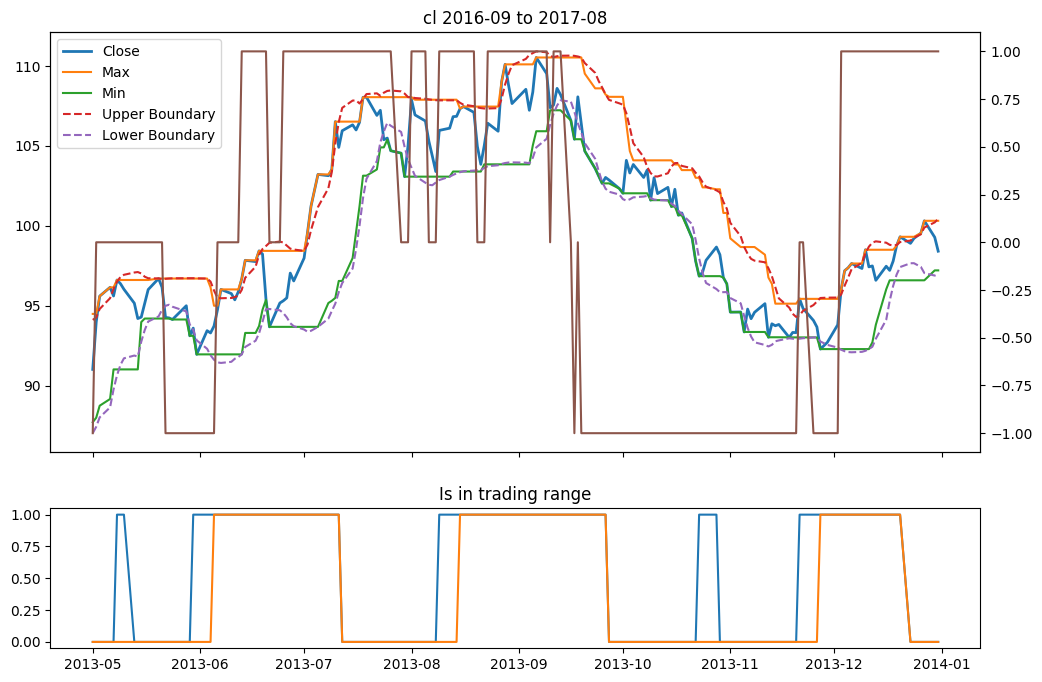

In [33]:
cl201314 = cl.loc["2013-05":"2013-12"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl201314.index, cl201314["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl201314.index, cl201314["Max"], label="Max", color="C1")
ax1.plot(cl201314.index, cl201314["Min"], label="Min", color="C2")
ax1.plot(cl201314.index, cl201314["Upper"], label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl201314.index, cl201314["Lower"], label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax1b = ax1.twinx()
ax1b.plot(cl201314.index, cl201314["weight"], label="weight", color="C5")

ax2.plot(cl201314["in_trading_range"], label="in_trading_range", color="C0")
ax2.plot(cl201314["tr_consecutive5"], label="in TR consecutive 5", color="C1")

ax2.set_title("Is in trading range")